Import main libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler

Import functions.

In [3]:
def data_info(table):
    table.info(memory_usage='deep')
    display(table.head(5))

def unique_check(table,column):
    max_value = table[column].max()
    min_value = table[column].min()
    display(max_value,min_value)
    display(table[column].value_counts())
    
def corr_info(table):
    display(table.corr())
    heatmap0 = sns.heatmap(table.corr(), 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': 1, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
    plt.show()
    plt.figure(figsize=(18,7))
    
def outlier_treatment(table,column):
    sorted(table[column])
    Q1,Q3 = np.percentile(table[column], [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    number_of_outliers = ((table[column] < lower_range) | (table[column] > upper_range)).sum()
    percentage_of_outliers = "{:.3%}".format(number_of_outliers/len(table[column]))
    stats = []
    stats.append([lower_range,upper_range,number_of_outliers,percentage_of_outliers])
    stats_df = pd.DataFrame(stats,columns = ['lower_range','upper_range','number_of_outliers','percentage_of_outliers'])
    return stats_df

def base_sample_linear(model,features,target,valid_split,scaler):
    train_features_non_scaled, valid_features_non_scaled, train_target, valid_target = train_test_split(
    features, target, test_size=valid_split, random_state=123455)

    scaler = scaler
    scaler.fit(train_features_non_scaled)
    train_features = scaler.transform(train_features_non_scaled)
    valid_features = scaler.transform(valid_features_non_scaled)

    model = model
    model.fit(train_features, train_target)
    predictions_valid = model.predict(valid_features)
    predictions_valid = pd.DataFrame(predictions_valid, index=valid_target.index)
    predictions_valid['new']= valid_target.index
    predictions_valid = predictions_valid.set_index('new')

    mean = predictions_valid[0].mean()
    mse = mean_squared_error(valid_target, predictions_valid)
    rmse = mse ** 0.5
    mae = mean_absolute_error(valid_target,predictions_valid)
    r2 = r2_score(valid_target,predictions_valid)
    stats = {'stats': ['mean','mse','rmse','mae','r2'],
            'values': [mean,mse,rmse,mae,r2]
            }
    stats_lin = pd.DataFrame(stats,columns = ['stats','values'])

    return stats_lin, valid_target, predictions_valid

In [4]:
region0 = pd.read_csv('C:/Users/OB/Desktop/projects_to_do/datasets/3_geo_data_0.csv')
region1 = pd.read_csv('C:/Users/OB/Desktop/projects_to_do/datasets/3_geo_data_1.csv')
region2 = pd.read_csv('C:/Users/OB/Desktop/projects_to_do/datasets/3_geo_data_2.csv')
#display(region0.loc[(region0['id'] == 'AGS9W')]

In [5]:
scaler = StandardScaler()

## Region 0

f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000

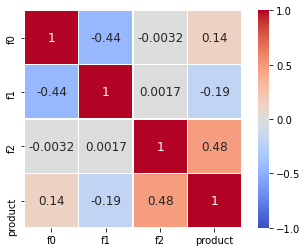

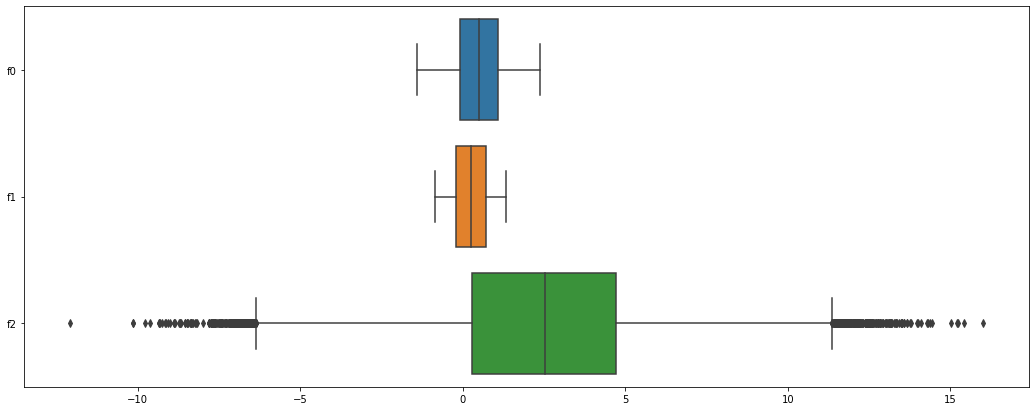

lower_range  upper_range  number_of_outliers percentage_of_outliers
0    -6.353261    11.356098                 506                 0.506%

In [6]:
#data_info(region0)
corr_info(region0)
sns.boxplot(data=region0, orient="h", order=["f0","f1","f2"])
plt.show()
outlier_treatment(region0,'f0')
outlier_treatment(region0,'f1')
outlier_treatment(region0,'f2')

stats       values
0  mean    92.637692
1   mse  1419.850935
2  rmse    37.680909
3   mae    31.029498
4    r2     0.273596

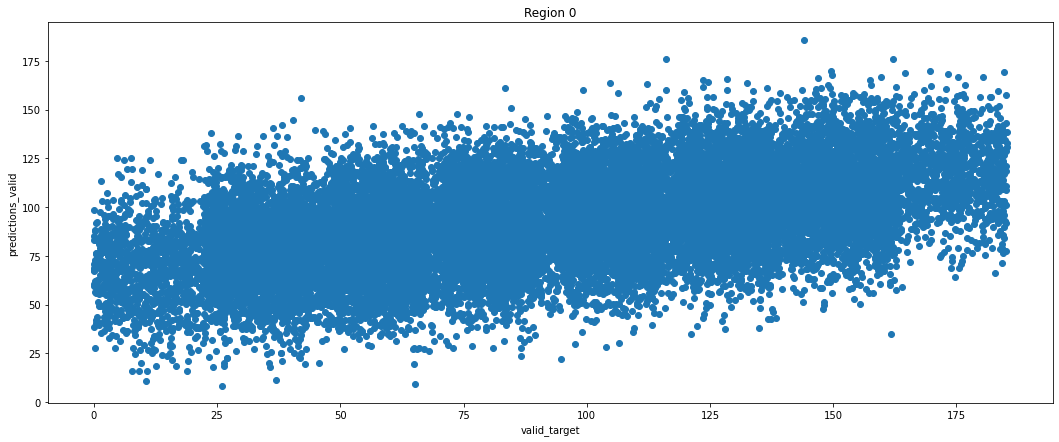

In [7]:
region00 = region0.drop('id', axis=1)
target_region0 = region00['product']
features_region0 = region00.drop('product', axis=1)

stats_region0, valid_target_region0, predictions_valid_region0 = base_sample_linear(LinearRegression(),features_region0,target_region0,0.25,scaler)
display(stats_region0)
plt.figure(figsize=(18,7))
plt.title('Region 0')
plt.xlabel('valid_target')
plt.ylabel('predictions_valid')
plt.scatter(valid_target_region0, predictions_valid_region0)
plt.show()

## Region 1

f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000

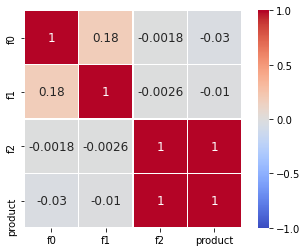

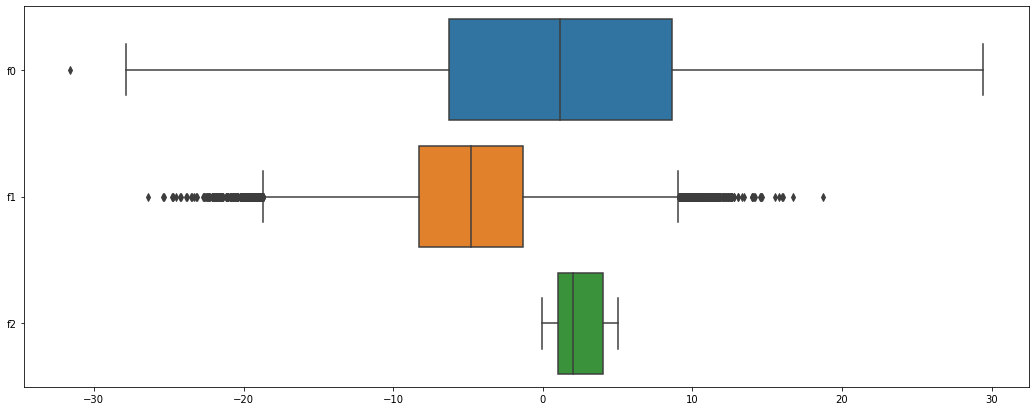

lower_range  upper_range  number_of_outliers percentage_of_outliers
0    -3.499803     8.499728                   0                 0.000%

In [8]:
#data_info(region1)
corr_info(region1)
sns.boxplot(data=region1, orient="h", order=["f0","f1","f2"])
plt.show()
outlier_treatment(region1,'f0')
outlier_treatment(region1,'f1')
outlier_treatment(region1,'f2')

stats     values
0  mean  68.537748
1   mse   0.787125
2  rmse   0.887201
3   mae   0.715010
4    r2   0.999629

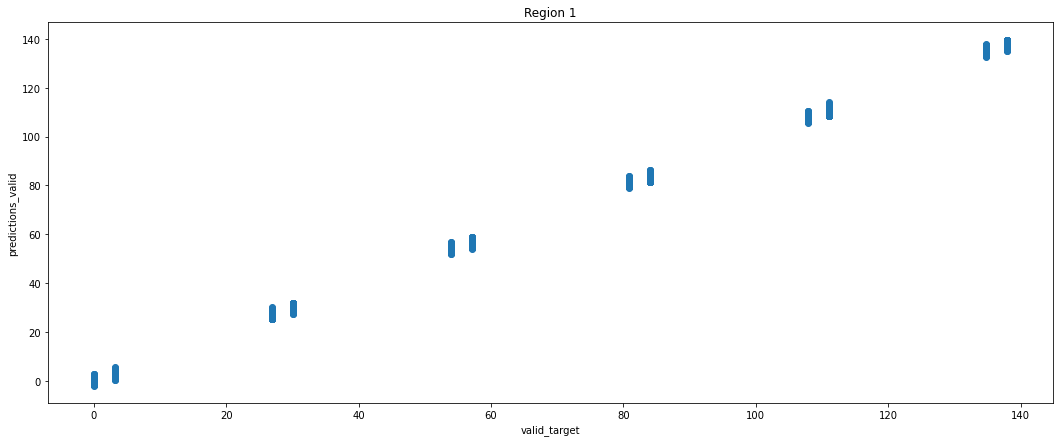

In [9]:
region11 = region1.drop('id', axis=1)
target_region1 = region11['product']
features_region1 = region11.drop('product', axis=1)

stats_region1, valid_target_region1, predictions_valid_region1 = base_sample_linear(LinearRegression(),features_region1,target_region1,0.25,scaler)
display(stats_region1)
plt.figure(figsize=(18,7))
plt.title('Region 1')
plt.xlabel('valid_target')
plt.ylabel('predictions_valid')
plt.scatter(valid_target_region1, predictions_valid_region1)
plt.show()

## Region 2

f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000

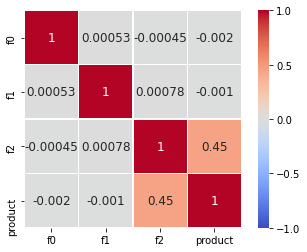

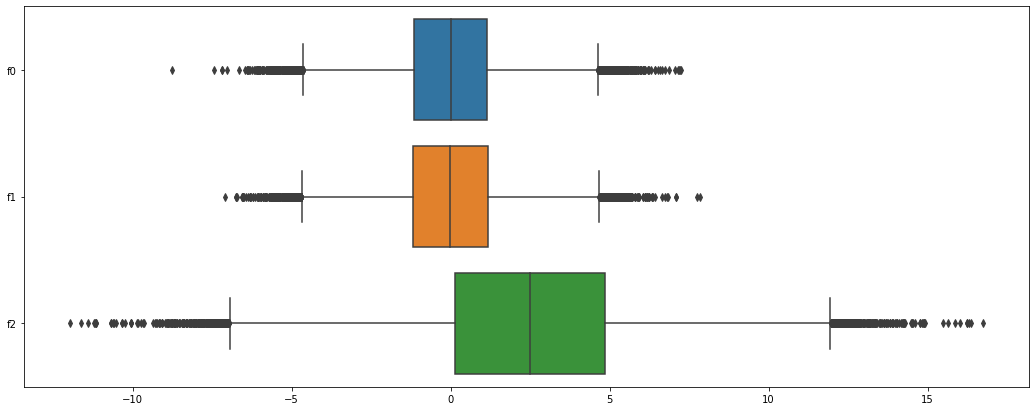

lower_range  upper_range  number_of_outliers percentage_of_outliers
0    -6.962294    11.951446                 584                 0.584%

In [10]:
#data_info(region2)
corr_info(region2)
sns.boxplot(data=region2, orient="h", order=["f0","f1","f2"])
plt.show()
outlier_treatment(region2,'f0')
outlier_treatment(region2,'f1')
outlier_treatment(region2,'f2')

stats       values
0  mean    95.045598
1   mse  1611.607709
2  rmse    40.144834
3   mae    32.863540
4    r2     0.195722

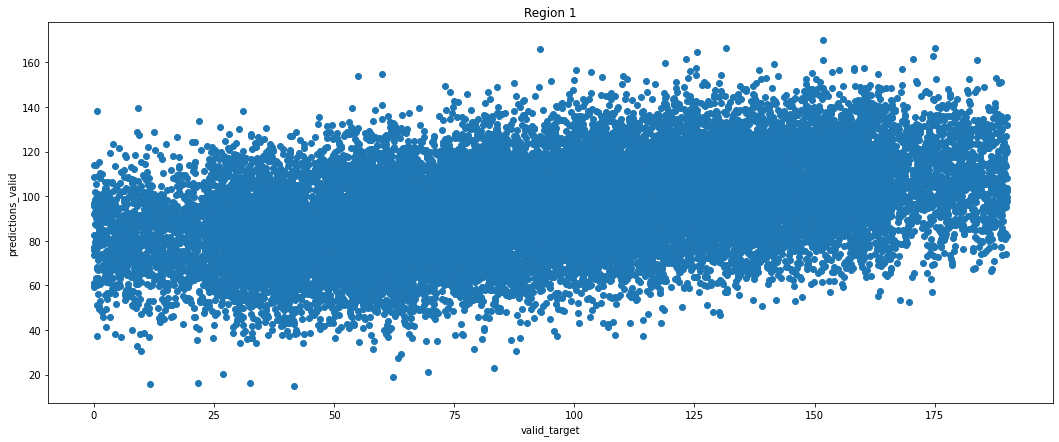

In [11]:
region22 = region2.drop('id', axis=1)
target_region2 = region22['product']
features_region2 = region22.drop('product', axis=1)

stats_region2, valid_target_region2, predictions_valid_region2 = base_sample_linear(LinearRegression(),features_region2,target_region2,0.25,scaler)
display(stats_region2)
plt.figure(figsize=(18,7))
plt.title('Region 1')
plt.xlabel('valid_target')
plt.ylabel('predictions_valid')
plt.scatter(valid_target_region2, predictions_valid_region2)
plt.show()

# Profit calculation

Barell equation:
    
$450000*200*x = 10000000$
    
Threrfore there is not enough raw material in regions.

In [12]:
SCOUT = 500 #oil deposits
SCOUT_PREF = 200 #need to develop
BUDGET = 10000000000 #RUR/region
budget_per_scout = BUDGET/SCOUT_PREF
BARELL = 450000 #rur
optimal_value = BUDGET/(BARELL*SCOUT_PREF) 
print('Optimal value:',optimal_value)

Optimal value: 111.11111111111111


In [13]:
mean0 = stats_region0.loc[0,'values']
mean1 = stats_region1.loc[0,'values']
mean2 = stats_region2.loc[0,'values']
percentage0 = "{:.3%}".format(mean0/optimal_value-1)
percentage1 = "{:.3%}".format(mean1/optimal_value-1)
percentage2 = "{:.3%}".format(mean2/optimal_value-1)
print('Delta between optimal value and region mean:',percentage0)
print('Delta between optimal value and region mean:',percentage1)
print('Delta between optimal value and region mean:',percentage2)

Delta between optimal value and region mean: -16.626%
Delta between optimal value and region mean: -38.316%
Delta between optimal value and region mean: -14.459%


In [14]:
def profit(target,predictions,BUDGET,BARELL,SCOUT_PREF):
    probs = predictions.sort_values(by = 0, ascending = False)
    selected = target[probs.index]
    sort_table = selected.head(SCOUT_PREF)
    rev = sort_table.sum()
    profit0 = rev*BARELL - BUDGET
    return profit0

Let's bootstrap our target and find out:
    
- average profit;
- confidence interval (95%);
- % of losses for each region.

Best region for oil production is Region 1. That has been obvious due to results of linear regression with r2 = 1. We do not know what data underlying the coeficients, but we assume there has been data emission in that region.      

In [15]:
state = np.random.RandomState(12345)
bootstrap_repeats = 1000
confidence_interval_wish = 0.95

In [16]:
values_region_0 = []
for i in range(bootstrap_repeats):
    target_subsample = valid_target_region0.sample(n=SCOUT, replace=True, random_state = state)
    probs_subsample = predictions_valid_region0.loc[target_subsample.index]
    values_region_0.append(profit(target_subsample,probs_subsample,BUDGET,BARELL,SCOUT_PREF))

values_region_0 = pd.Series(values_region_0)
values_region_0_neg = values_region_0[values_region_0<0].dropna()
losses_percantage_0 = values_region_0_neg.count()/values_region_0.count()
mean_region_0 = values_region_0.mean()
lower_region_0 = values_region_0.quantile(0.025)
upper_region_0 = values_region_0.quantile(0.975)

print('Region 0 profit:',mean_region_0)
print('Region 0 lower limit of conf. interval:',lower_region_0)
print('Region 0 higher limit of conf. interval:',upper_region_0)
print('Region 0 losses percentage: {:.3%}'.format(losses_percantage_0))
#display(values_region_0.sort_values())

Region 0 profit: 417056663.9371899
Region 0 lower limit of conf. interval: -129308225.06473507
Region 0 higher limit of conf. interval: 943980922.3011374
Region 0 losses percentage: 7.100%


In [17]:
values_region_1 = []
for i in range(bootstrap_repeats):
    target_subsample = valid_target_region1.sample(n=SCOUT, replace=True, random_state = state)
    probs_subsample = predictions_valid_region1.loc[target_subsample.index]
    values_region_1.append(profit(target_subsample,probs_subsample,BUDGET,BARELL,SCOUT_PREF))

values_region_1 = pd.Series(values_region_1)
values_region_1_neg = values_region_1[values_region_1<0].dropna()
losses_percantage_1 = values_region_1_neg.count()/values_region_1.count()
mean_region_1 = values_region_1.mean()
lower_region_1 = values_region_1.quantile(0.025)
upper_region_1 = values_region_1.quantile(0.975)

print('Region 1 profit:',mean_region_1)
print('Region 1 lower limit of conf. interval:',lower_region_1)
print('Region 1 higher limit of conf. interval:',upper_region_1)
print('Region 1 losses percentage: {:.3%}'.format(losses_percantage_1))
#display(values_region_0.sort_values())

Region 1 profit: 509228948.7216515
Region 1 lower limit of conf. interval: 101792487.06498398
Region 1 higher limit of conf. interval: 970069502.9224924
Region 1 losses percentage: 0.900%


In [18]:
values_region_2 = []
for i in range(bootstrap_repeats):
    target_subsample = valid_target_region2.sample(n=SCOUT, replace=True, random_state = state)
    probs_subsample = predictions_valid_region2.loc[target_subsample.index]
    values_region_2.append(profit(target_subsample,probs_subsample,BUDGET,BARELL,SCOUT_PREF))

values_region_2 = pd.Series(values_region_2)
values_region_2_neg = values_region_2[values_region_2<0].dropna()
losses_percantage_2 = values_region_2_neg.count()/values_region_2.count()
mean_region_2 = values_region_2.mean()
lower_region_2 = values_region_2.quantile(0.025)
upper_region_2 = values_region_2.quantile(0.975)

print('Region 2 profit:',mean_region_2)
print('Region 2 lower limit of conf. interval:',lower_region_2)
print('Region 2 higher limit of conf. interval:',upper_region_2)
print('Region 2 losses percentage: {:.3%}'.format(losses_percantage_2))
#display(values_region_0.sort_values())

Region 2 profit: 361163907.9887969
Region 2 lower limit of conf. interval: -192579838.75017434
Region 2 higher limit of conf. interval: 911127438.6065061
Region 2 losses percentage: 10.700%


Let's look at distributions. 
Most to the right is Region 1 which best for oil search.

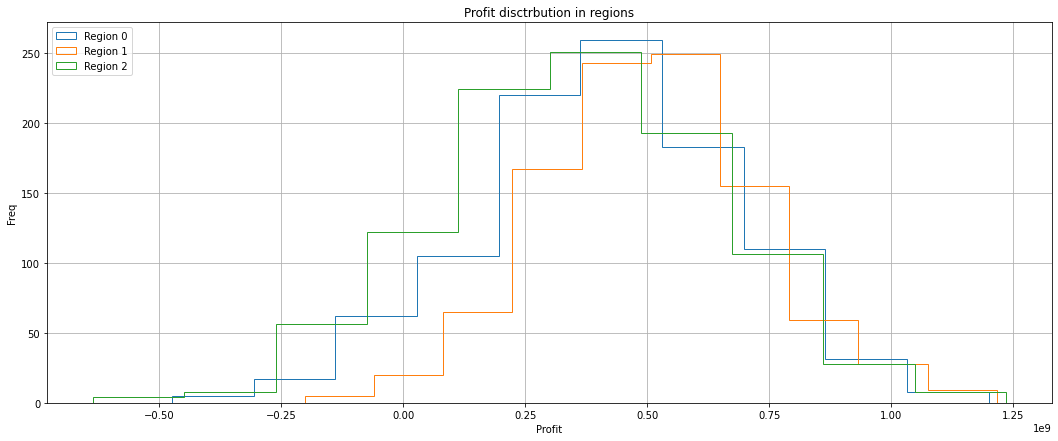

In [19]:
plt.figure(figsize=(18,7))
plt.title('Profit disctrbution in regions')
plt.xlabel('Profit')
plt.ylabel('Freq')
values_region_0.hist(histtype='step',label="Region 0")
values_region_1.hist(histtype='step',label="Region 1")
values_region_2.hist(histtype='step',label="Region 2")
plt.legend()
plt.show()

# Conclusions

We have explored three regions for wells drilling and calculated profit.
Our main conclusions:
    
- region 1 is the best out of three for oil production, given the inputs we have;
- region 1 has strong corellation of f2 and product. We have to obtain extra information on f2 feature and double check the calculation after it.